In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.tight_layout()
plt.style.use('seaborn-v0_8-darkgrid')

from utils import *

<Figure size 640x480 with 0 Axes>

### Load the Dataset

In [3]:
df = dataset()

### Abstracts Word Cloud

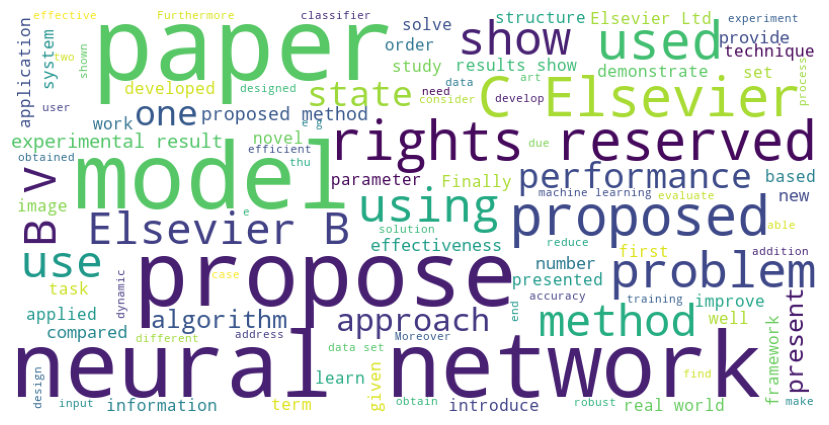

In [146]:
# Word Cloud of the abstracts
from wordcloud import WordCloud

abstracts = df['Abstract'].dropna().tolist()
abstracts_string = ' '.join(abstracts)

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, max_font_size=100, random_state=42).generate(abstracts_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Missing `Abstracts` Analysis

In [4]:
# Proportion of missing abstracts

df_missing_abstracts = pd.DataFrame(df['Abstract'].isnull().value_counts())
df_missing_abstracts.rename(columns={'Abstract':'Count'}, inplace=True)
df_missing_abstracts['Percentage'] = df_missing_abstracts['Count'].apply(lambda x: str(round(x/df_missing_abstracts['Count'].sum()*100, 3))+'%')
df_missing_abstracts.index = ['Abstract available', 'Abstract missing']
df_missing_abstracts

,Count,Percentage
Abstract available,164756,97.629%
Abstract missing,4001,2.371%


In [10]:
df.iloc[np.where(df['Abstract'].isnull())].to_csv('missing.csv', index=False)

#### Time distribution of missing abstracts

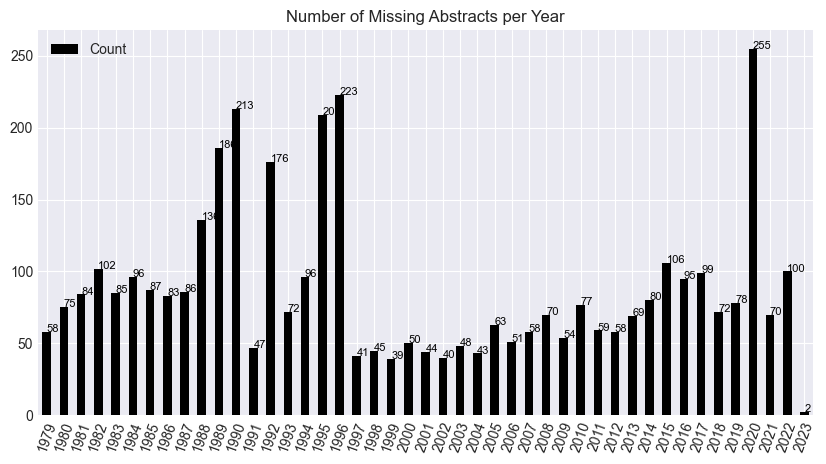

In [13]:
# Bar plot of the number of publications per year

df_pub_year = pd.DataFrame(df.iloc[np.where(df['Abstract'].isnull())]['Publication Year'].value_counts())
df_pub_year.rename(columns={'Publication Year':'Count'}, inplace=True)
df_pub_year.sort_index(inplace=True)
df_pub_year.plot(kind='bar', figsize=(10, 5), title='Number of Missing Abstracts per Year', color='black')

for i, v in enumerate(df_pub_year['Count']):
    plt.text(i-0.004, v+0.05, str(v)[:3], color='black', fontsize=8)

plt.xticks([i for i in range(0, len(df_pub_year.index), 1)], [int(i) for i in df_pub_year.index], rotation=70)
plt.show()

### Comentários sobre os Abstracts faltantes

1. Os Abstracts faltantes estão distribuídos de manera relativamente uniforme no dataset, com alguns anos de pico, por exeplo o ano de 2020. Apenas 2.371% dos registros estão sem Abstracts. Como a quantidade de registros é muito grande, a perda de informação é pequena;

2. Uma análise mais detalhada dos registros sem Abstracts não consegue explicar a razão pela qual eles estão faltando. É possível preencher boa parte dos valores faltantes por meio de um Scrapping do Google Scholar.

## `Article Title` Analysis

In [27]:
# Proportion of missing Article Title

df_missing_abstracts = pd.DataFrame(df['Article Title'].isnull().value_counts())
df_missing_abstracts.rename(columns={'Article Title':'Count'}, inplace=True)
df_missing_abstracts['Percentage'] = df_missing_abstracts['Count'].apply(lambda x: str(round(x/df_missing_abstracts['Count'].sum()*100, 3))+'%')
df_missing_abstracts.index = ['Article Title available']
df_missing_abstracts

,Count,Percentage
Article Title available,168757,100.0%


### Comentários sobre os Article Titles faltantes

1. Não existem valores de Título do Artigo faltantes.

## Missing Dates Analysis

In [28]:
# Proportion of missing Publication Year

df_missing_abstracts = pd.DataFrame(df['Publication Year'].isnull().value_counts())
df_missing_abstracts.rename(columns={'Publication Year':'Count'}, inplace=True)
df_missing_abstracts['Percentage'] = df_missing_abstracts['Count'].apply(lambda x: str(round(x/df_missing_abstracts['Count'].sum()*100, 3))+'%')
df_missing_abstracts.index = ['Publication Year available', 'Publication Year missing']
df_missing_abstracts

,Count,Percentage
Publication Year available,165691,98.183%
Publication Year missing,3066,1.817%


In [199]:
# Proportion of missing Publication Date

df_missing_abstracts = pd.DataFrame(df['Publication Date'].isnull().value_counts())
df_missing_abstracts.rename(columns={'Publication Date':'Count'}, inplace=True)
df_missing_abstracts['Percentage'] = df_missing_abstracts['Count'].apply(lambda x: str(round(x/df_missing_abstracts['Count'].sum()*100, 3))+'%')
df_missing_abstracts.index = ['Publication Month available', 'Publication Month missing']
df_missing_abstracts

,Count,Percentage
Publication Month available,93679,55.511%
Publication Month missing,75078,44.489%


### Comentários sobre as Datas faltantes

1. Os artigos com valores faltantes para `Publication Year` correspondem à publicações que não foram realizadas ainda e estão disponíveis em Early Acces. É possível preencher esses valores com o ano atual;

2. Os artigos com valores faltantes para `Publication Date` correspondem à publicações em conferências que não possuem data fixa de publicação, pois acontecem ao longo de alguns dias. É possível preencher esses valores com a data em que se iniciou a conferência;

3. Ainda assim alguns valores ficariam faltando para o dia exato em que a publicação foi realizada. Na minha opinião a melhor forma de realizar a análise seria por meio da frenquência **mensal** de publicações.

## `Publication Type` Analysis

In [22]:
df_pub_type = pd.DataFrame(df['Publication Type'].value_counts())
df_pub_type.rename(columns={'Publication Type':'Count'}, inplace=True)
df_pub_type['Percentage'] = df_pub_type['Count'].apply(lambda x: str(round(x/df_pub_type['Count'].sum()*100, 3))+'%')
df_pub_type.index = ['Journal', 'Conference', 'Series', 'Book']
df_pub_type

,Count,Percentage
Journal,95626,56.665%
Conference,72188,42.776%
Series,940,0.557%
Book,3,0.002%


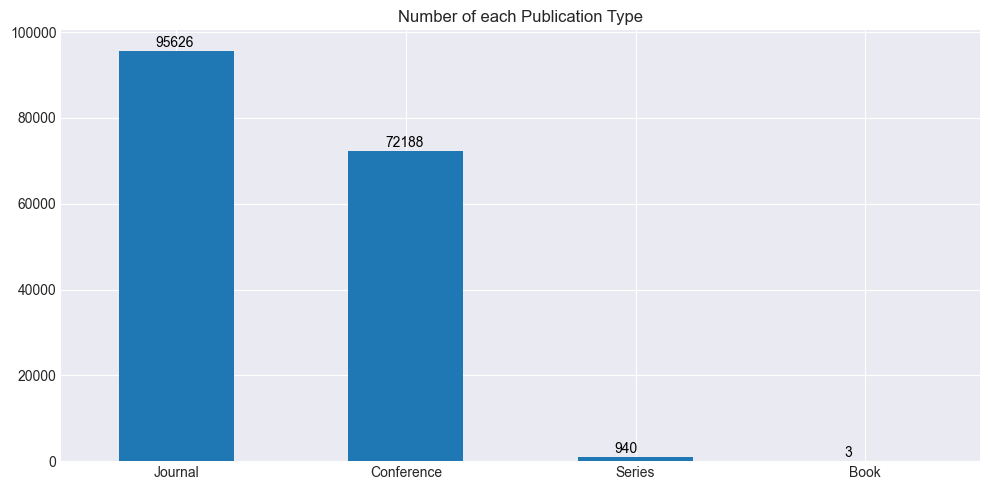

In [21]:
# Bar plot of the number of conferences and journals

df['Publication Type'].value_counts().plot(kind='bar', figsize=(10, 5), title='Number of each Publication Type')

plt.xticks([0, 1, 2, 3], ['Journal', 'Conference', 'Series', 'Book'], rotation=0)
plt.xticks(rotation=0)

for i, v in enumerate(df['Publication Type'].value_counts()):
    plt.text(i-0.09, v+1000, str(v), color='black')

plt.show()

### Temporal Analysis of the Dataset

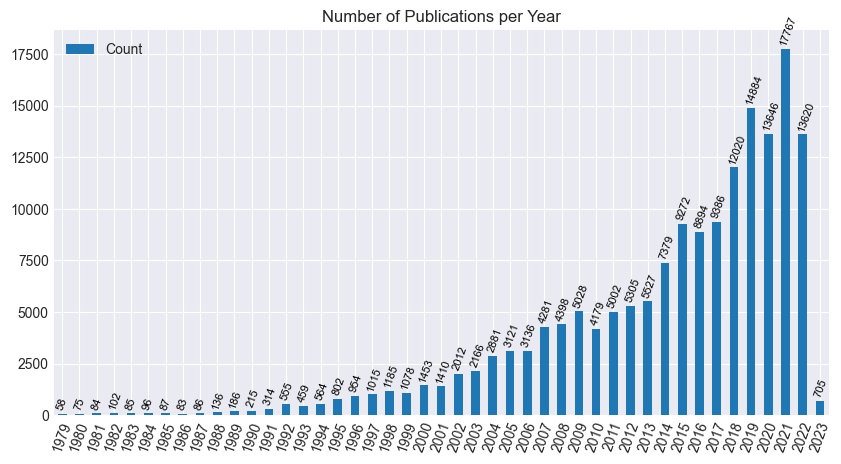

In [19]:
# Bar plot of the number of publications per year

df_pub_year = pd.DataFrame(df['Publication Year'].value_counts())
df_pub_year.rename(columns={'Publication Year':'Count'}, inplace=True)
df_pub_year.sort_index(inplace=True)
df_pub_year.plot(kind='bar', figsize=(10, 5), title='Number of Publications per Year')

for i, v in enumerate(df_pub_year['Count']):
    plt.text(i-0.4, v+200, str(v), color='black', fontsize=8, rotation=70)

plt.xticks([i for i in range(0, len(df_pub_year.index), 1)], [int(i) for i in df_pub_year.index], rotation=70)
plt.show()

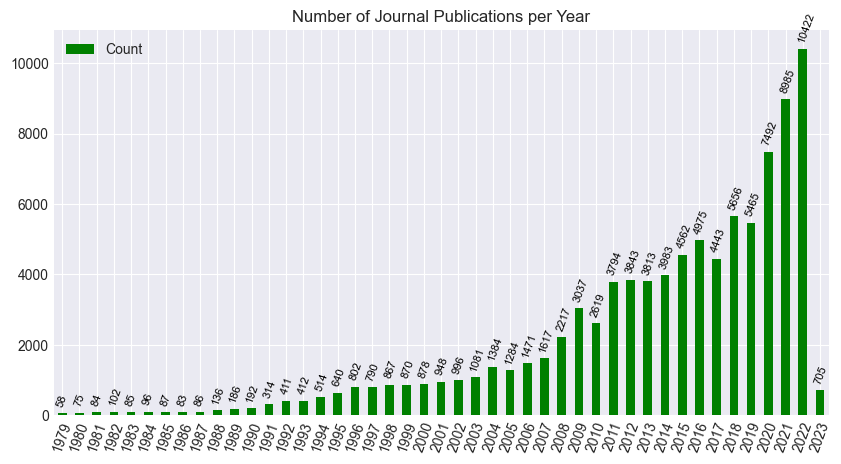

In [18]:
# Bar plot of the number of Journal Publications per year

df_pub_year = pd.DataFrame(df.iloc[np.where(df['Publication Type'] == 'J')]['Publication Year'].value_counts())
df_pub_year.rename(columns={'Publication Year':'Count'}, inplace=True)
df_pub_year.sort_index(inplace=True)
df_pub_year.plot(kind='bar', figsize=(10, 5), title='Number of Journal Publications per Year', color = 'green')

for i, v in enumerate(df_pub_year['Count']):
    plt.text(i-0.4, v+200, str(v), color='black', fontsize=8, rotation=70)

plt.xticks([i for i in range(0, len(df_pub_year.index), 1)], [int(i) for i in df_pub_year.index], rotation=70)

plt.show()

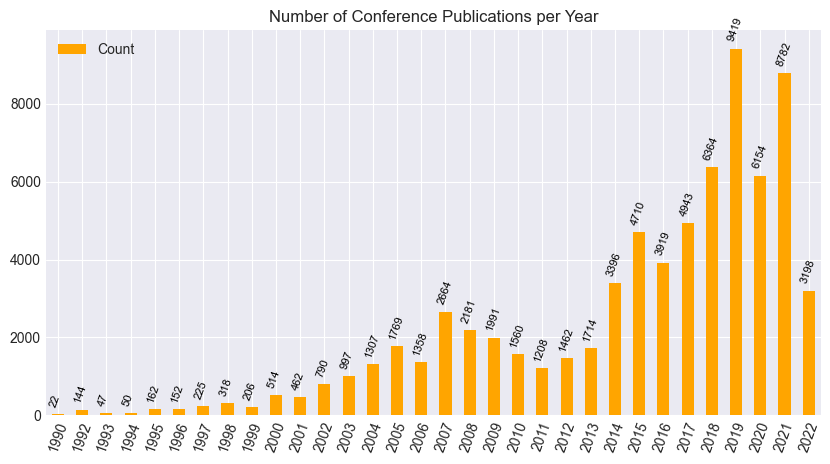

In [17]:
# Bar plot of the number of Conference Publications per year

df_pub_year = pd.DataFrame(df.iloc[np.where(df['Publication Type'] == 'C')]['Publication Year'].value_counts())
df_pub_year.rename(columns={'Publication Year':'Count'}, inplace=True)
df_pub_year.sort_index(inplace=True)
df_pub_year.plot(kind='bar', figsize=(10, 5), title='Number of Conference Publications per Year', color = 'orange')

for i, v in enumerate(df_pub_year['Count']):
    plt.text(i-0.4, v+200, str(v), color='black', fontsize=8, rotation =70)

plt.xticks([i for i in range(0, len(df_pub_year.index), 1)], [int(i) for i in df_pub_year.index], rotation=70)

plt.show()

### Publications Sources Frequency

In [29]:
# Number of Plublications per Source

count = []
for file in os.listdir('./database/venues'):
    df_venue = pd.read_csv('./database/venues/'+file)
    count.append(tuple([file[:-4], df_venue.shape[0]]))

df_pub_source = pd.DataFrame(count, columns=['Source', 'Count'])
df_pub_source.sort_values(by='Count', ascending=False, inplace=True)

# Merge the dataframe with the query_dataframe.csv
df_pub_source = pd.merge(df_pub_source, pd.read_csv('./database/query_dataframe.csv')[['SIGLA', 'Nome']], left_on='Source', right_on='SIGLA', how='left').drop(columns=['SIGLA'])
df_pub_source = df_pub_source[['Nome', 'Source', 'Count']]
df_pub_source.columns = ['Nome', 'SIGLA', 'Count']
df_pub_source

,Nome,SIGLA,Count
0,Neurocomputing,Neurocomputing,17830
1,Expert Systems with Applications,ESA,17273
2,International Conference on Machine Learning,ICML,15785
3,International Conference on Computer Vision (I...,ICCV,12051
4,AAAI Conference on Artificial Intelligence,AAAI,9246
5,Applied Soft Computing,WFSC,8369
6,Neural Computing and Applications,NCA,8296
7,IEEE Transactions on Pattern Analysis and Mach...,IEEE-TPAMI,7226
8,Knowledge-Based Systems,KBS,6767
9,Neural Information Processing Systems,NIPS,6020


In [28]:
from semanticscholar import SemanticScholar
sch = SemanticScholar()


# If the abstract is missing replace it with the semantic scholar search result

for i in range(df.shape[0]):
    if pd.isnull(df.iloc[i]['Abstract']):
        try:
            paper = sch.get_paper(df.iloc[i]['DOI'])
            df.at[i, 'Abstract'] = paper.abstract
        except:
            pass

print(len(df.iloc[np.where(df['Abstract'].isnull())]))

Integrated Micro-Video Recommender Based on Hadoop and Web-Scrapper
None
2726


In [29]:
# show avaible methods in the Semantic Scholar API
dir(paper)

['FIELDS',
 'SEARCH_FIELDS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abstract',
 '_authors',
 '_citationCount',
 '_citations',
 '_data',
 '_embedding',
 '_externalIds',
 '_fieldsOfStudy',
 '_influentialCitationCount',
 '_init_attributes',
 '_isOpenAccess',
 '_journal',
 '_paperId',
 '_publicationDate',
 '_publicationTypes',
 '_referenceCount',
 '_references',
 '_s2FieldsOfStudy',
 '_title',
 '_tldr',
 '_url',
 '_venue',
 '_year',
 'abstract',
 'authors',
 'citationCount',
 'citations',
 'embedding',
 'externalIds',
 'fieldsOfStudy',
 'influentialCitationCount',
 'isOpenAccess',
 'journal',
 'keys',
 'paperId',
 'publicationDate',
 'publication

In [32]:
print("beijinhos nene se cuida feliz ano novo 2023 é nós te amo :o <33333333333333333333333333333333333333333333333333333333333333333333")

beijinhos nene se cuida feliz ano novo 2023 é nós te amo :o <33333333333333333333333333333333333333333333333333333333333333333333
